# Predicting Salary of Software Developers

## Supervised machine learning scenario

## Data Collection

In [1]:
# Bringing in some general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data using pandas and make a copy
df = pd.read_csv('../datasets/full/2020/survey_results_public.csv', na_values='?', comment = '\t', sep=',', skipinitialspace=True)

# data = df.copy()

# Creating a new dataframe which only contains US data
data_us = df[df.Country == 'United States']

In [3]:
# Confirming the data read was successful
data_us.sample(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
30736,19495,I am a developer by profession,Yes,22.0,10,Yearly,350000.0,350000.0,United States,United States dollar,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Flask;Vue.js,Flask,Just as welcome now as I felt last year,70.0,10,3
34466,18667,I am a developer by profession,Yes,26.0,10,Yearly,70000.0,70000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,React.js;Spring,A lot less welcome now than last year,40.0,16,3
40988,40594,I am a developer by profession,Yes,NaN,7,Yearly,80000.0,80000.0,United States,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,NaN,35,8
33934,58016,I am a developer by profession,Yes,26.0,11,Yearly,109000.0,109000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,Mathematics or statistics,ASP.NET Core,ASP.NET;ASP.NET Core;Express;Flask;jQuery;Spring,Just as welcome now as I felt last year,35.0,15,7
31714,25162,I am a developer by profession,No,NaN,14,Yearly,120000.0,120000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Ruby on Rails,Angular;ASP.NET;ASP.NET Core;Django;Flask,Just as welcome now as I felt last year,60.0,10,4
32332,29242,"I am not primarily a developer, but I write co...",Yes,34.0,24,Weekly,175000.0,175000.0,United States,United States dollar,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",NaN,Angular;Angular.js;Django;Express;jQuery;React...,Just as welcome now as I felt last year,40.0,12,10
39720,2814,I am a developer by profession,No,38.0,8,Yearly,135000.0,135000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask,Flask,A lot less welcome now than last year,40.0,30,12
58,29856,I am a student who is learning to code,Yes,38.0,38,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Angular.js;jQuery;Laravel;React.js;Vue.js,Angular;Angular.js;jQuery;Laravel;React.js;Sym...,A lot more welcome now than last year,NaN,1,Less than 1 year
30756,26189,I am a developer by profession,No,29.0,19,Yearly,200000.0,200000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,40.0,10,7
8735,57889,I am a developer by profession,Yes,24.0,16,Yearly,85000.0,85000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Flask;React.js;Ruby on Rails,Angular;React.js;Spring,Just as welcome now as I felt last year,45.0,8,3


### Problem Statement:
The data contains ConvertedComp data which is continous data and tells us the total compensation of the developer.

The aim is to **predict the total compensation for a developer** given we have the feature variables for a potential candidate.

In [4]:
# Looking at information about the data
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12469 entries, 4 to 60708
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    12469 non-null  int64  
 1   MainBranch                    12438 non-null  object 
 2   Hobbyist                      12469 non-null  object 
 3   Age                           9619 non-null   float64
 4   Age1stCode                    11785 non-null  object 
 5   CompFreq                      8643 non-null   object 
 6   CompTotal                     8341 non-null   float64
 7   ConvertedComp                 8354 non-null   float64
 8   Country                       12469 non-null  object 
 9   CurrencyDesc                  9767 non-null   object 
 10  CurrencySymbol                9767 non-null   object 
 11  DatabaseDesireNextYear        8479 non-null   object 
 12  DatabaseWorkedWith            9763 non-null   object 
 13  D

In [5]:
# Data set contains 60 columns, we only want to focus on some of those

pd.options.mode.chained_assignment = None  # default='warn'

data_us.drop(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal' ,'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs'], axis=1, inplace=True)

In [6]:
# Looking at information about the data after dropping some columns (returns 12,469 rows)
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12469 entries, 4 to 60708
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8354 non-null   float64
 1   Country        12469 non-null  object 
 2   EdLevel        11804 non-null  object 
 3   YearsCode      11785 non-null  object 
 4   YearsCodePro   10179 non-null  object 
dtypes: float64(1), object(4)
memory usage: 584.5+ KB


In [7]:
data_us.sample(20)

,ConvertedComp,Country,EdLevel,YearsCode,YearsCodePro
49310,NaN,United States,NaN,NaN,NaN
32740,50000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",12,5
35783,250000.0,United States,Some college/university study without earning ...,20,18
2509,72000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",5,3
2273,127000.0,United States,"Secondary school (e.g. American high school, G...",5,4
49790,NaN,United States,NaN,NaN,NaN
2030,NaN,United States,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",5,NaN
33635,NaN,United States,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",15,NaN
37553,170000.0,United States,"Other doctoral degree (Ph.D., Ed.D., etc.)",24,4
34082,80000.0,United States,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",15,10


In [8]:
# Checking the counts of null values in the US data
data_us.isnull().sum()

ConvertedComp    4115
Country             0
EdLevel           665
YearsCode         684
YearsCodePro     2290
dtype: int64

In [9]:
# Analyzing only data where target variable is reported in survey
data_us.dropna(subset=['ConvertedComp'], inplace=True)
data_us.isnull().sum()

ConvertedComp    0
Country          0
EdLevel          1
YearsCode        0
YearsCodePro     3
dtype: int64

In [10]:
# Analyzing only data where feature variable is reported in survey
# data_us.dropna(subset=['YearsCode'], inplace=True)
# data_us.isnull().sum()

In [11]:
# Analyzing only data where feature variable is reported in survey
data_us.dropna(subset=['YearsCodePro'], inplace=True)
data_us.isnull().sum()

ConvertedComp    0
Country          0
EdLevel          1
YearsCode        0
YearsCodePro     0
dtype: int64

In [12]:
# Analyzing only data where feature variable is reported in survey
data_us.dropna(subset=['EdLevel'], inplace=True)
data_us.isnull().sum()

ConvertedComp    0
Country          0
EdLevel          0
YearsCode        0
YearsCodePro     0
dtype: int64

In [13]:
# Looking at information about the data after dropping some rows (returns 8,350 rows)
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8350 entries, 99 to 60708
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8350 non-null   float64
 1   Country        8350 non-null   object 
 2   EdLevel        8350 non-null   object 
 3   YearsCode      8350 non-null   object 
 4   YearsCodePro   8350 non-null   object 
dtypes: float64(1), object(4)
memory usage: 391.4+ KB


In [14]:
data_us.sample(20)

,ConvertedComp,Country,EdLevel,YearsCode,YearsCodePro
945,250000.0,United States,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",3,2
35949,145000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",20,13
8707,85000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",8,4
2315,115000.0,United States,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",5,4
5686,85000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",7,Less than 1 year
3940,200000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",7,3
3176,107000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",6,1
35394,125000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",19,9
34464,70000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",16,4
1029,90000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",3,3


In [15]:
data_us.describe()

,ConvertedComp
count,8350.000000
mean,123610.296886
std,67029.634168
min,7500.000000
25%,80000.000000
50%,110000.000000
75%,150000.000000
max,650000.000000


<AxesSubplot:xlabel='ConvertedComp'>

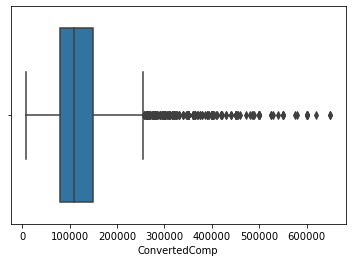

In [16]:
sns.boxplot(x=data_us['ConvertedComp'])

In [17]:
data_us['YearsCode'] = data_us['YearsCode'].replace(['More than 50 years', 'Less than 1 year'], ['51', '0'])

In [18]:
data_us['YearsCodePro'] = data_us['YearsCodePro'].replace(['More than 50 years', 'Less than 1 year', 'less than 1 year'], ['51', '0', '0'])

In [19]:
data_us['ConvertedComp'].value_counts()

120000.0    361
100000.0    308
150000.0    284
110000.0    254
130000.0    221
           ... 
67200.0       1
306500.0      1
56100.0       1
81200.0       1
106500.0      1
Name: ConvertedComp, Length: 802, dtype: int64

In [20]:
# category distribution, looking for unique values
data_us['YearsCode'].value_counts()

10    655
20    486
6     426
8     424
7     414
5     393
15    382
12    360
25    300
9     281
4     256
11    232
14    231
16    220
13    220
3     215
30    213
18    198
17    188
22    173
40    161
23    137
35    137
2     129
21    126
19    120
24    111
26     95
38     85
0      83
27     72
51     69
28     68
37     67
1      61
36     58
32     58
34     56
42     48
29     45
33     37
45     36
31     34
43     32
41     30
39     29
44     25
48     18
47     17
46     14
49     14
50     11
Name: YearsCode, dtype: int64

In [21]:
# category distribution, looking for unique values
data_us['EdLevel'].value_counts()

Bachelor's degree (B.A., B.S., B.Eng., etc.)                                          4813
Master's degree (M.A., M.S., M.Eng., MBA, etc.)                                       1539
Some college/university study without earning a degree                                 969
Associate degree (A.A., A.S., etc.)                                                    436
Other doctoral degree (Ph.D., Ed.D., etc.)                                             304
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     193
Professional degree (JD, MD, etc.)                                                      43
I never completed any formal education                                                  30
Primary/elementary school                                                               23
Name: EdLevel, dtype: int64

In [22]:
data_us['YearsCodePro'].value_counts()

3     736
5     680
2     674
4     566
10    475
6     461
0     411
7     411
1     391
8     376
20    327
15    303
12    268
9     204
13    181
11    179
14    152
25    151
16    151
22    111
18     97
21     93
30     88
19     84
23     83
17     72
24     71
40     53
26     51
27     50
35     44
28     41
38     32
51     28
34     26
31     24
32     24
33     24
45     23
29     22
36     21
37     19
39     18
44     11
42     11
41     10
48      6
43      6
49      4
47      3
46      3
Name: YearsCodePro, dtype: int64

In [23]:
# Making sure data is floats and/or ints (ignoring Country)
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8350 entries, 99 to 60708
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8350 non-null   float64
 1   Country        8350 non-null   object 
 2   EdLevel        8350 non-null   object 
 3   YearsCode      8350 non-null   object 
 4   YearsCodePro   8350 non-null   object 
dtypes: float64(1), object(4)
memory usage: 391.4+ KB


In [24]:
data_us['YearsCode'] = data_us['YearsCode'].astype(str).astype(int)

In [25]:
data_us['YearsCodePro'] = data_us['YearsCodePro'].astype(str).astype(int)

0 - I never completed any formal education    
1 - Primary/elementary school           
2 - Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
3 - Some college/university study without earning a degree    
4 - Associate degree (A.A., A.S., etc.)         
5 - Bachelor’s degree (B.A., B.S., B.Eng., etc.)
6 - Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         
7 - Professional degree (JD, MD, etc.)          
8 - Other doctoral degree (Ph.D., Ed.D., etc.)   

In [26]:
data_us['EdLevel'] = data_us['EdLevel'].replace(['I never completed any formal education', 'Primary/elementary school', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Some college/university study without earning a degree', 'Associate degree (A.A., A.S., etc.)', "Bachelor's degree (B.A., B.S., B.Eng., etc.)", "Master's degree (M.A., M.S., M.Eng., MBA, etc.)", 'Professional degree (JD, MD, etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)'], ['0', '1', '2', '3', '4', '5', '6', '7', '8'])

In [27]:
data_us['EdLevel'] = data_us['EdLevel'].astype(str).astype(int)

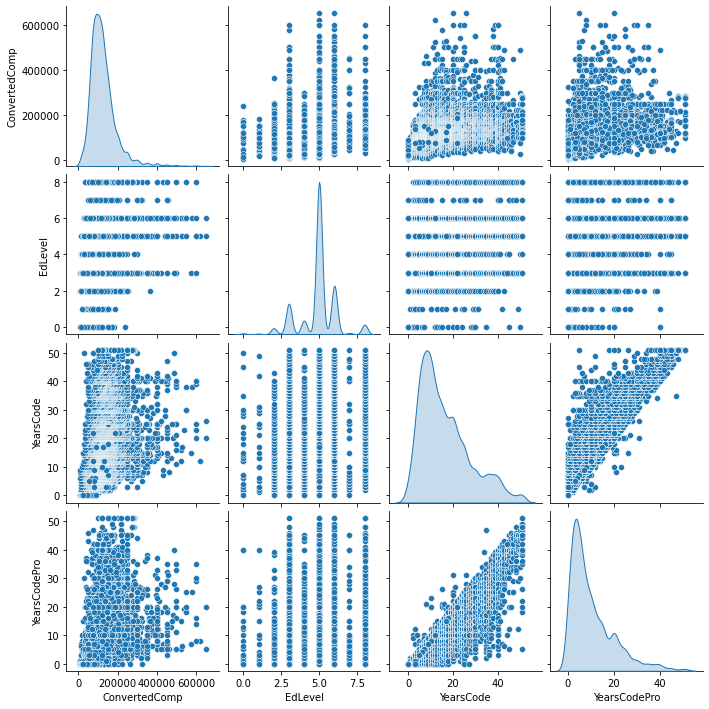

In [28]:
# pairplots to get an overview of potential correlations in the data
sns.pairplot(data_us[['ConvertedComp', 'EdLevel', 'YearsCode', 'YearsCodePro']], diag_kind='kde')

In [29]:
# Making sure data is floats and/or ints (ignoring Country), and that there are no null values
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8350 entries, 99 to 60708
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8350 non-null   float64
 1   Country        8350 non-null   object 
 2   EdLevel        8350 non-null   int64  
 3   YearsCode      8350 non-null   int64  
 4   YearsCodePro   8350 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 391.4+ KB


In [30]:
data_us.describe()

,ConvertedComp,EdLevel,YearsCode,YearsCodePro
count,8350.000000,8350.000000,8350.000000,8350.000000
mean,123610.296886,4.921198,16.435449,10.362994
std,67029.634168,1.176798,11.249587,9.622997
min,7500.000000,0.000000,0.000000,0.000000
25%,80000.000000,5.000000,8.000000,3.000000
50%,110000.000000,5.000000,14.000000,7.000000
75%,150000.000000,5.000000,22.000000,15.000000
max,650000.000000,8.000000,51.000000,51.000000


In [31]:
# Creating a save point to protect the data so far
data_us.to_csv('../datasets/views/2020/data-us-2020.csv', index=False)

## Next: Working on the machine learning model with scikit-learn